54
Country
Germany            1011
France              823
Spain               373
Netherlands         304
United Kingdom      284
Italy               182
Austria             172
Switzerland         163
Norway              156
Poland              149
Sweden              128
Belgium              78
Russia               63
Denmark              51
Finland              37
Greece               37
Portugal             26
Czech Republic       22
Ireland              19
Ukraine              16
Hungary              15
Slovakia             15
Romania              14
Bulgaria             14
Croatia              11
Türkiye              11
Slovenia             10
Estonia              10
Fiji                 10
United States         9
Iceland               8
Czechia               6
Turkey                5
Serbia                5
Lithuania             4
Luxembourg            4
Australia             3
Cyprus                3
Canada                2
Israel                2
Latvia                2
Mexic

<Axes: xlabel='Country'>

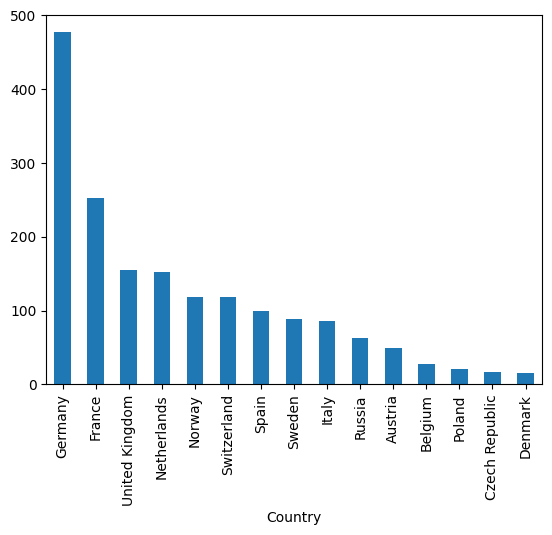

In [19]:
#analysis of country distribution from my datasets
#!pip install matplotlib
import pandas as pd
import matplotlib

#load the data from my locations folder and read the csv files
#I have 10 datasets, so I will read them all
df1 = pd.read_csv('locations/combined_data.csv')
df2 = pd.read_csv('locations/location_amadeus.csv')

#count the number of each country
country_count = df1["Country"].value_counts()
country_count2 = df2["Country"].value_counts()

#print(country_count)
#show total number of rows
print(country_count.count())
print(country_count)
#show the number of unique countries


#plot the data
#country_count.plot(kind='bar')
#show only the top 10 countries
#country_count[:15].plot(kind='bar')
country_count2[:15].plot(kind='bar')

#country_count[10:30].plot(kind='bar', color='red')

In [15]:
import pandas as pd
import requests
from requests.structures import CaseInsensitiveDict

# Replace 'YOUR_API_KEY' with your actual Geoapify API key
api_key = 'edb8cde1acdc48f39b75476ff37d05f3'

# Load the csv file
df = pd.read_csv('locations/location_uk.csv')

# Define the API endpoint
base_url = 'https://api.geoapify.com/v1/geocode/search'

# Define the headers for the API request
headers = CaseInsensitiveDict()
headers['Accept'] = 'application/json'

# Initialize an empty list to store country information
countries = []

# Loop through each address to retrieve the country
for index, row in df.iterrows():
    address = row['Address']

    if pd.isnull(address):
        countries.append(None)
        continue

    # Define the parameters for the API request
    params = {
        'text': address,
        'apiKey': api_key,
        'lang': 'en',  # Set the language to English
        'limit': 1,  # Set the limit to 1 to get the first result
        'type': 'amenity'  # Set the location type to amenity (you can adjust this based on your needs)
    }

    # Send the API request
    response = requests.get(base_url, params=params, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()

        # Check if 'features' list is not empty
        if len(response_data['features']) > 0:
            # Extract the country from the response
            country = response_data['features'][0]['properties']['country']

            # Append the country to the list
            countries.append(country)

            # Print the address and country for each successful request
            print(f"Address: {address}")
            print(f"Country: {country}")
            print()
        else:
            print(f"No results found for address: {address}")
            countries.append(None)
    else:
        print(f"Error geocoding address: {address}")
        countries.append(None)

# Create a new column in the DataFrame to store the country information
df['Country'] = countries

# Save the updated DataFrame to a new CSV file
df.to_csv('locations/location_uk_country.csv', index=False)

print("Country information added to the DataFrame.")



No results found for address: Unit 1 Sycamore Court, Warrington Road, Runcorn, Cheshire, WA7 1RS
No results found for address: 3 Manor Court, Salesbury Hall Road, Ribchester, PR3 3XR
No results found for address: Air Products PLC, Hersham Technology Park, Molesey Road, Hersham, KT12 4RZ
Address: 7 Bell Yard, London, WC2A 2JR
Country: United Kingdom

No results found for address: Units 1-3 Smeaton Road, Wester Gourdie Industrial Estate, Dundee, Tayside, DD2 4UT
Address: 17 Charterhouse St, London, EC1N 6RA
Country: United Kingdom

Address: Unit 71, Washford Industrial Estate, Heming Rd, Redditch, B98 0EA
Country: United Kingdom

No results found for address: Carrwood Park, Selby Road, Leeds, LS15 4LG
Address: 41 Lothbury, London, EC2R 7HF
Country: United Kingdom

Address: Forge, 43 Church Street West, Woking, Surrey, GU21 6HT
Country: United Kingdom

Address: Skirbeck Road, Boston, Lincolnshire, PE21 6AF
Country: United Kingdom

Address: BP International Limited, Chertsey Road, Sunbury 

In [27]:
df_de = pd.read_csv('locations/deutschland_projecte.csv')
df_de['Country'] = 'Germany'

df_de.to_csv('locations/location_de_country.csv', index=False)

In [2]:
!pip install googletrans
from googletrans import Translator
import pandas as pd

# Read the CSV file
df = pd.read_csv('locations/location_amadeus.csv')

# Create a translator object
translator = Translator()

# Country code to country name mapping dictionary for European countries
european_countries = {
    'AL': 'Albania',
    'AD': 'Andorra',
    'AM': 'Armenia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan',
    'BY': 'Belarus',
    'BE': 'Belgium',
    'BA': 'Bosnia and Herzegovina',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IE': 'Ireland',
    'IT': 'Italy',
    'KZ': 'Kazakhstan',
    'LV': 'Latvia',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'MD': 'Moldova',
    'MC': 'Monaco',
    'ME': 'Montenegro',
    'NL': 'Netherlands',
    'MK': 'North Macedonia',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'RU': 'Russia',
    'SM': 'San Marino',
    'RS': 'Serbia',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'VA': 'Vatican City'
}

# Translate the "Land" column
def translate_country_code(code):
    return european_countries.get(code, None)

df['Country'] = df['Länderkürzel'].apply(translate_country_code)

# Save the translated DataFrame to a new CSV file
df.to_csv('locations/location_amadeus.csv', index=False)


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 55.1/55.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.

In [45]:
dfx = pd.read_excel('locations/combined_excel.xlsx')
dfx

dfx.to_csv('locations/location.csv', index=False)

In [4]:
#transform into excel files
import pandas as pd
df1 = pd.read_csv('locations/location_amadeus.csv')


df1.to_excel('locations/location_amadeus.xlsx', index=False)